# Direct Marketing Campaigns 

- the goal is to predict if the client will subscribe a term deposit

### Dataset Information:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

This dataset is publicly available for research. The details are described in [Moro et al., 2014]. 

Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001
  Available at: 
  - [pdf] http://dx.doi.org/10.1016/j.dss.2014.03.001
  - [bib] http://www3.dsi.uminho.pt/pcortez/bib/2014-dss.txt


### Dataset description:

Input variables:
#### Bank client data:
1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
6. balance: average yearly balance, in euros (numeric) 
7. housing: has housing loan? (categorical: 'no','yes','unknown')
8. loan: has personal loan? (categorical: 'no','yes','unknown')
#### Related with the last contact of the current campaign:
9. contact: contact communication type (categorical: 'cellular','telephone')
10. day: last contact day of the month (numeric)
11. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
12. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
15. previous: number of contacts performed before this campaign and for this client (numeric)
16. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):
17. y - has the client subscribed a term deposit? (binary: 'yes','no')


### ML models:
1. Logistic Regression
2. K-Nearest Neighbours
3. Support Vector Machine
4. Kernel SVM
5. Naive Bayes
6. Decision Tree Classification
7. Random Forest Classification
8. XGBoost
9. Artificial Neural Networks

## Import Libraries and Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
sns.set()
%matplotlib inline

In [2]:
dataset = pd.read_csv('bank.csv')

## Exploratory Data Analysis

In [3]:
dataset.head(10)

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [4]:
dataset.describe()

,Unnamed: 0,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22605.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,0.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11302.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22605.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33907.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  45211 non-null  int64 
 1   age         45211 non-null  int64 
 2   job         45211 non-null  object
 3   marital     45211 non-null  object
 4   education   45211 non-null  object
 5   default     45211 non-null  object
 6   balance     45211 non-null  int64 
 7   housing     45211 non-null  object
 8   loan        45211 non-null  object
 9   contact     45211 non-null  object
 10  day         45211 non-null  int64 
 11  month       45211 non-null  object
 12  duration    45211 non-null  int64 
 13  campaign    45211 non-null  int64 
 14  pdays       45211 non-null  int64 
 15  previous    45211 non-null  int64 
 16  poutcome    45211 non-null  object
 17  y           45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


In [6]:
dataset.duplicated().sum()

0

In [7]:
dataset.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
                       'contact', 'month', 'poutcome']
numerical_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### Categorical Columns

In [9]:
def categorical_columns_countplot(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    sns.countplot(x = column, data = dataset)
    sns.set_style("whitegrid", {'axes.grid' : False})
    
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)
    
    sns.despine()

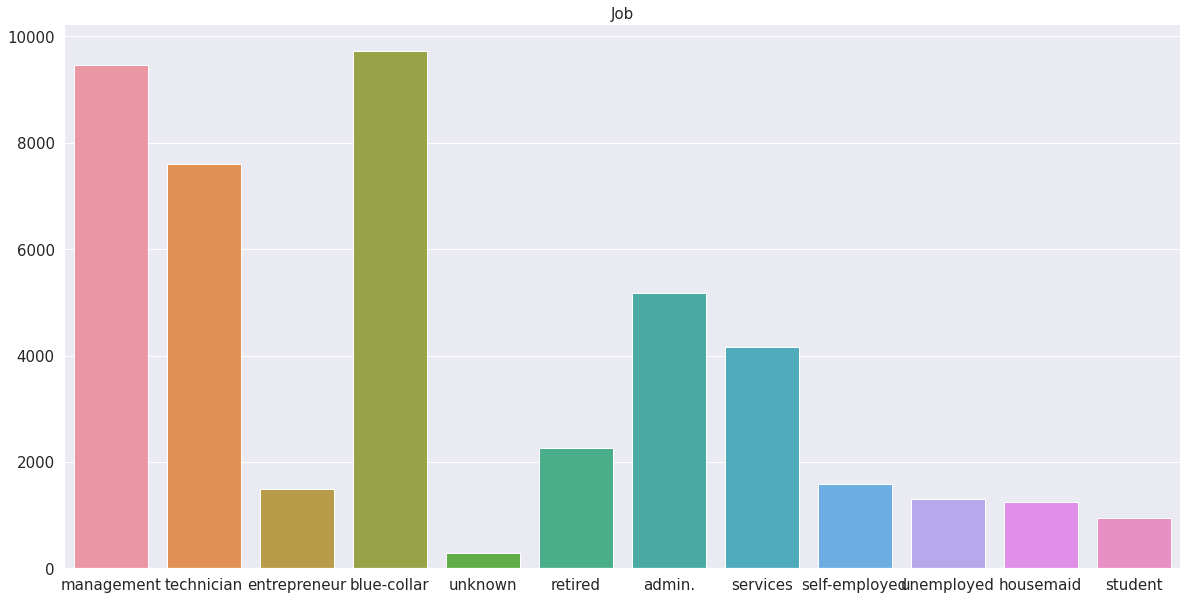

In [10]:
categorical_columns_countplot(20, 10, categorical_columns[0], "Job")

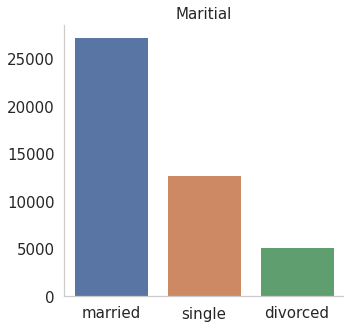

In [11]:
categorical_columns_countplot(5, 5, categorical_columns[1], "Maritial")

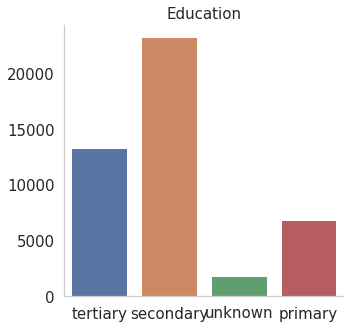

In [12]:
categorical_columns_countplot(5, 5, categorical_columns[2], "Education")

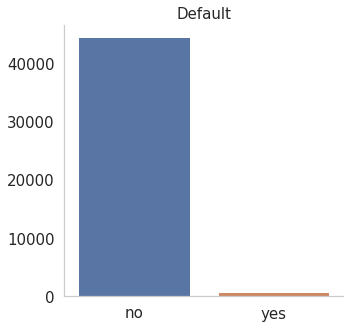

In [13]:
categorical_columns_countplot(5, 5, categorical_columns[3], "Default")

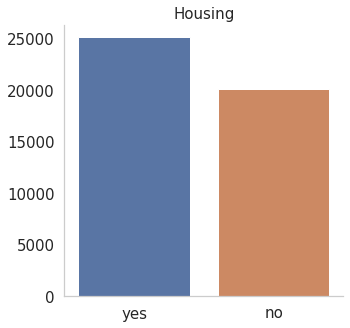

In [14]:
categorical_columns_countplot(5, 5, categorical_columns[4], "Housing")

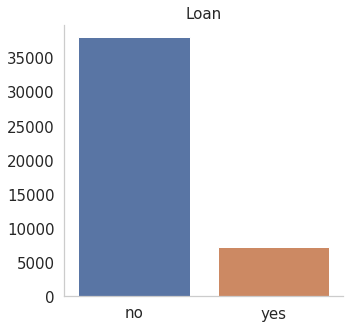

In [15]:
categorical_columns_countplot(5, 5, categorical_columns[5], "Loan")

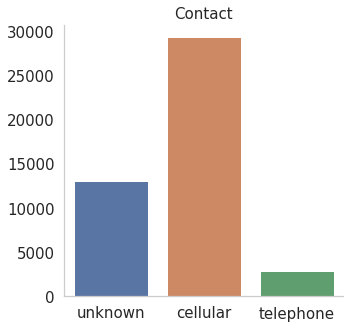

In [16]:
categorical_columns_countplot(5, 5, categorical_columns[6], "Contact")

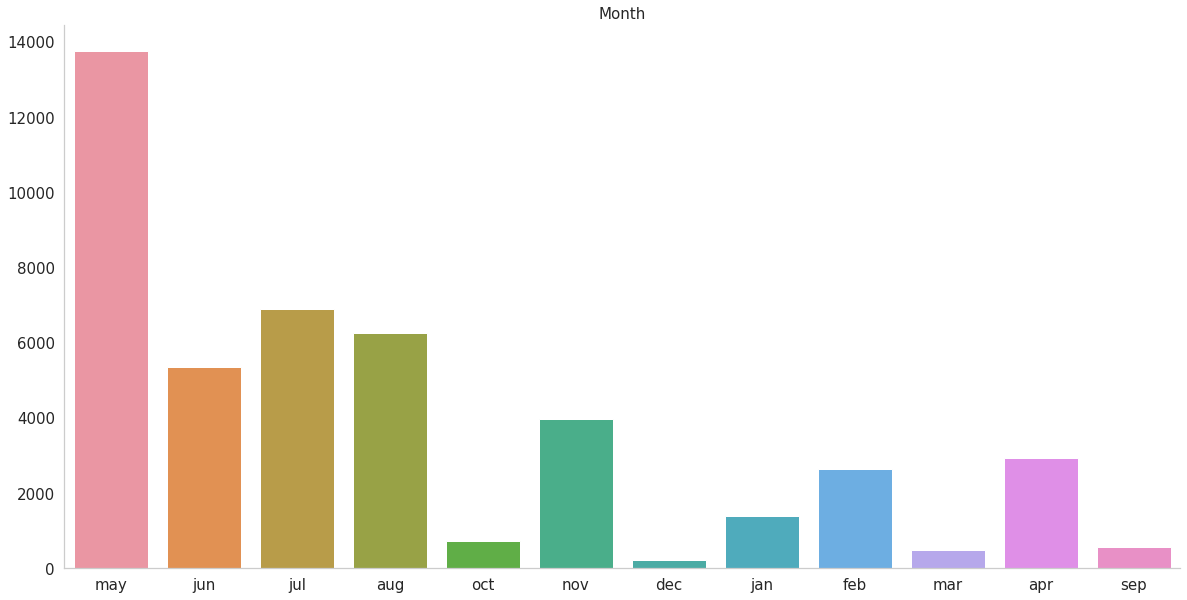

In [17]:
categorical_columns_countplot(20, 10, categorical_columns[7], "Month")

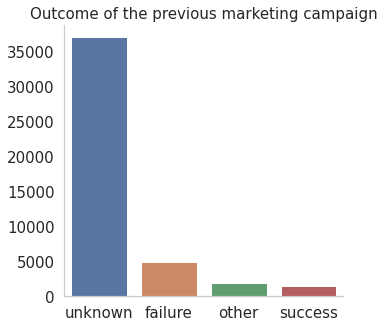

In [18]:
categorical_columns_countplot(5, 5, categorical_columns[8], "Outcome of the previous marketing campaign")

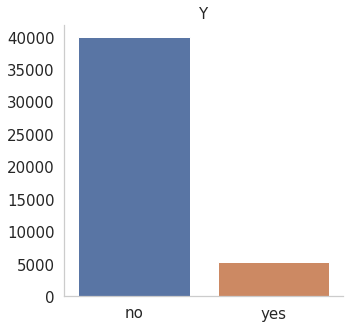

In [19]:
categorical_columns_countplot(5, 5, dataset["y"], "Y")

### Numerical Columns

In [20]:
def numerical_columns_histplot(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    
    ax.hist(dataset[column])
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)

    sns.despine()

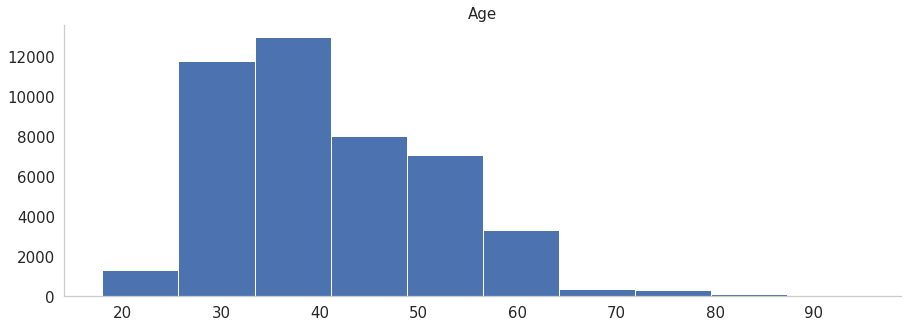

In [21]:
numerical_columns_histplot(15, 5, numerical_columns[0], "Age")

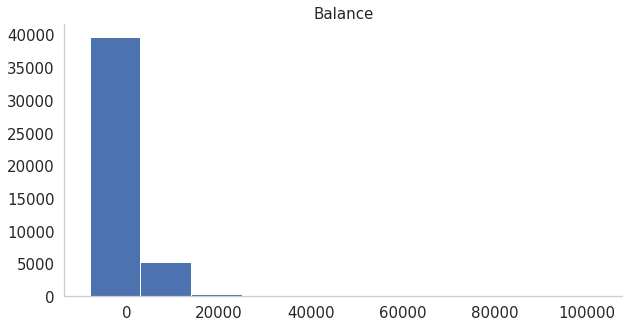

In [22]:
numerical_columns_histplot(10, 5, numerical_columns[1], "Balance")

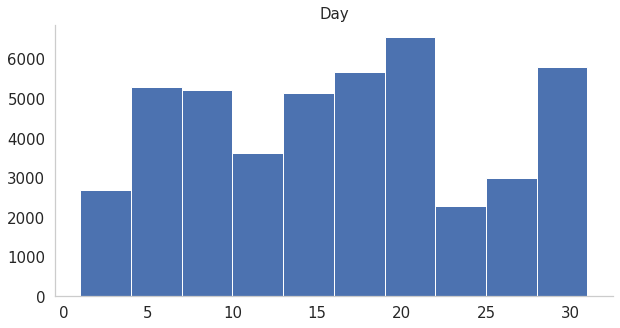

In [23]:
numerical_columns_histplot(10, 5, numerical_columns[2], "Day")

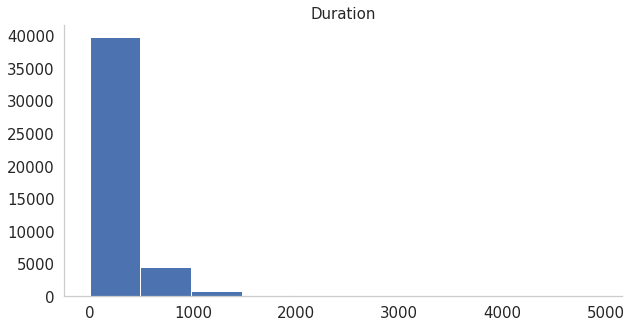

In [24]:
numerical_columns_histplot(10, 5, numerical_columns[3], "Duration")

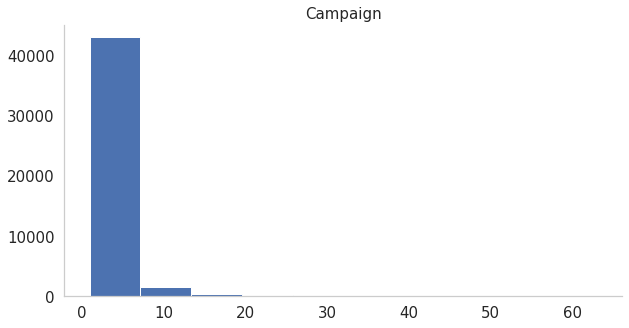

In [25]:
numerical_columns_histplot(10, 5, numerical_columns[4], "Campaign")

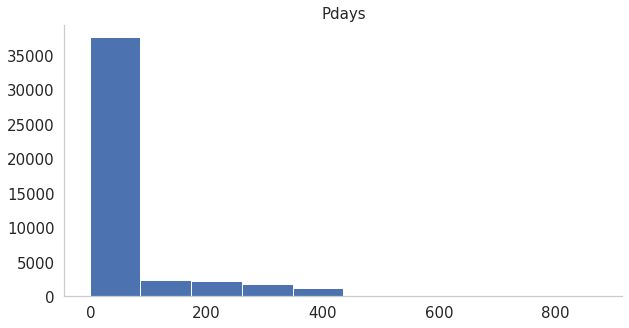

In [26]:
numerical_columns_histplot(10, 5, numerical_columns[5], "Pdays")

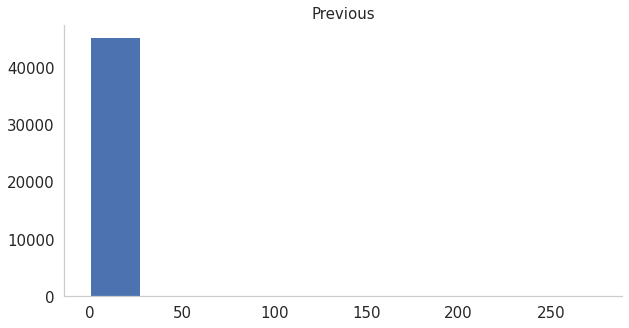

In [27]:
numerical_columns_histplot(10, 5, numerical_columns[6], "Previous")

### Looking for Possible Outliers

In [28]:
dataset[['balance', 'duration', 'campaign', 'previous', 'pdays']].describe()

,balance,duration,campaign,previous,pdays
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,1362.272058,258.163080,2.763841,0.580323,40.197828
std,3044.765829,257.527812,3.098021,2.303441,100.128746
min,-8019.000000,0.000000,1.000000,0.000000,-1.000000
25%,72.000000,103.000000,1.000000,0.000000,-1.000000
50%,448.000000,180.000000,2.000000,0.000000,-1.000000
75%,1428.000000,319.000000,3.000000,0.000000,-1.000000
max,102127.000000,4918.000000,63.000000,275.000000,871.000000


In [29]:
len(dataset[dataset['previous'] > 25])

28

Since there is only 28 of 45.211 total values are above of 25, I'm dropping all values above 25.

In [30]:
index_names = dataset[dataset['previous'] > 25].index 
dataset.drop(index_names, inplace = True) 

In [31]:
len(dataset[dataset['previous'] > 25])

0

In [32]:
print(len(dataset[dataset['pdays'] > 100]))
print(len(dataset[dataset['pdays'] > 200]))
print(len(dataset[dataset['pdays'] > 300]))
print(len(dataset[dataset['pdays'] > 400]))
print(len(dataset[dataset['pdays'] == 999]))
print(len(dataset[dataset['pdays'] == -1]))

6796
3937
2462
232
0
36954


Also, dropping all values from pdays that are above 400.
In dataset description stays that 999 stands for "client wasn't previously contacted", but since that there are 0 values with 999, and 36.954 with -1, I guess that -1 stands for "client wasn't previously contacted" and that this is an error in description.

In [33]:
index_names = dataset[dataset['pdays'] > 400].index 
dataset.drop(index_names, inplace = True)

In [34]:
len(dataset[dataset['pdays'] > 400])

0

In [35]:
print(len(dataset[dataset['campaign'] > 10]))
print(len(dataset[dataset['campaign'] > 15]))
print(len(dataset[dataset['campaign'] > 20]))
print(len(dataset[dataset['campaign'] > 30]))

1195
530
244
59


Dropping all Campaign values above 30.

In [36]:
index_names = dataset[dataset['campaign'] > 30].index 
dataset.drop(index_names, inplace = True)

In [37]:
len(dataset[dataset['campaign'] > 30])

0

In [38]:
print(len(dataset[dataset['duration'] > 1000]))
print(len(dataset[dataset['duration'] > 2000]))
print(len(dataset[dataset['duration'] > 3000]))

1051
59
14


In [39]:
print(len(dataset[dataset['balance'] > 10000]))
print(len(dataset[dataset['balance'] > 20000]))
print(len(dataset[dataset['balance'] > 30000]))

821
189
50


### Comparing Dependent Variable with Independent variables

In [40]:
def comparing_variables(size_x, size_y, column, title):
    fig, ax = plt.subplots()
    fig.set_size_inches(size_x, size_y)
    sns.countplot(x = column, hue = 'y', data = dataset, palette = 'viridis')
    
    ax.set_xlabel("", fontsize = 15)
    ax.set_ylabel("", fontsize = 15)
    ax.set_title(title, fontsize = 15)
    ax.tick_params(labelsize = 15)
    
    sns.despine()

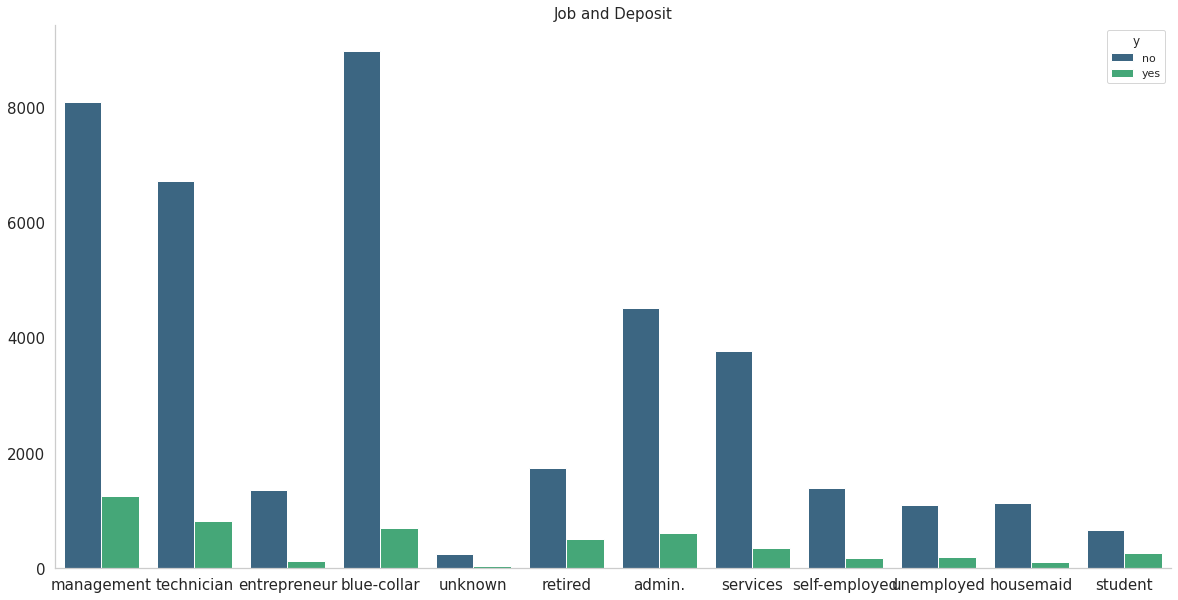

In [41]:
comparing_variables(20, 10, categorical_columns[0], "Job and Deposit")

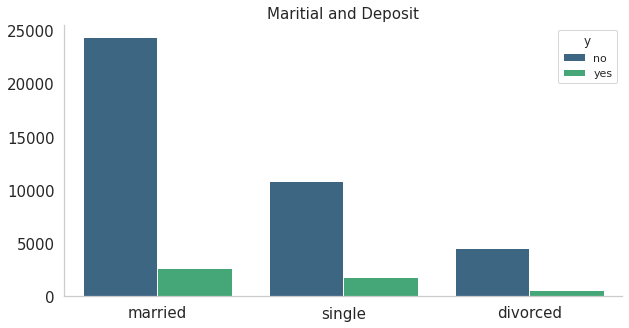

In [42]:
comparing_variables(10, 5, categorical_columns[1], "Maritial and Deposit")

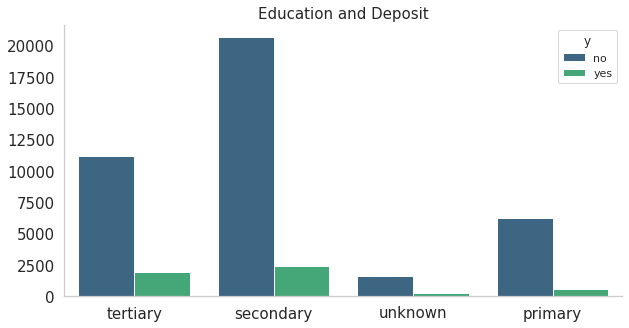

In [43]:
comparing_variables(10, 5, categorical_columns[2], "Education and Deposit")

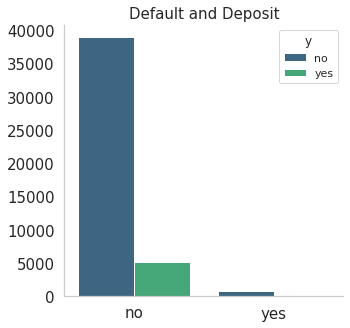

In [44]:
comparing_variables(5, 5, categorical_columns[3], "Default and Deposit")

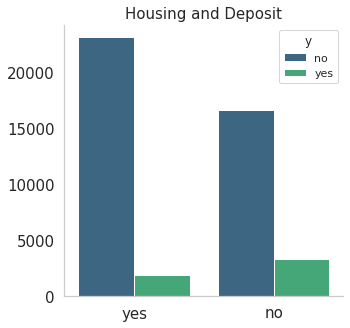

In [45]:
comparing_variables(5, 5, categorical_columns[4], "Housing and Deposit")

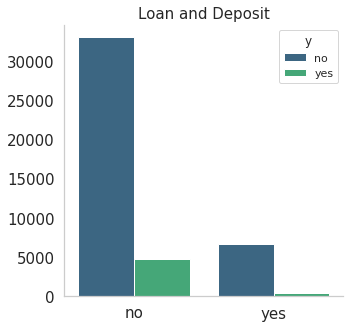

In [46]:
comparing_variables(5, 5, categorical_columns[5], "Loan and Deposit")

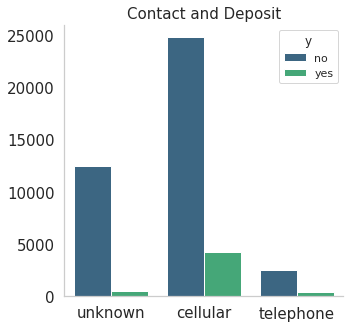

In [47]:
comparing_variables(5, 5, categorical_columns[6], "Contact and Deposit")

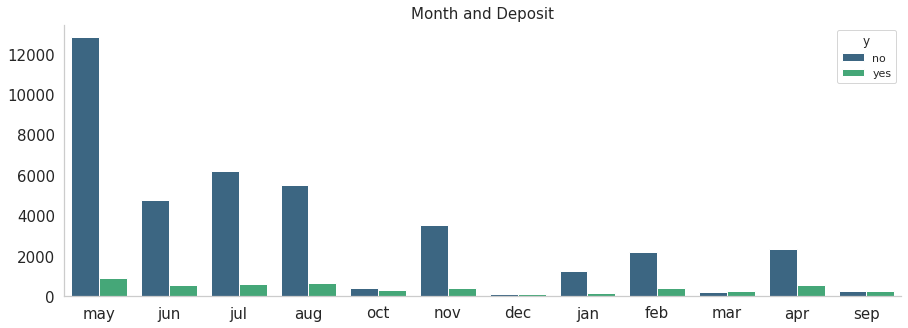

In [48]:
comparing_variables(15, 5, categorical_columns[7], "Month and Deposit")

In [49]:
len(dataset.age.unique())

77

In [50]:
# Creating age bins, and setting dummy values. 1 = 18-32, 2 = 33-48, 3 = 49-65, 4 = 65+. Bins are created according to quartiles.

bins = [0, 33, 49, 65, np.inf]
names = [1, 2, 3, 4]

dataset['age_range'] = pd.cut(dataset['age'], bins, labels = names)

dataset.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,3
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,2
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,1
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,2
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,1


In [51]:
age_labels = ['18-32', '33-48', '49-65', '65+']

# Function for extracting data for creating the table for comparing Ages and Y/N deposits.
def getCount(yes_no, age_bin):
    extract = pd.DataFrame()
    extract = dataset.loc[(dataset.y == yes_no) & (dataset.age_range == age_bin)]
    return len(extract)

age_yes_no_0 = pd.DataFrame(data=[[getCount("no", 1), getCount("no", 2), getCount("no", 3), getCount("no", 4)]], 
                          columns=[age_labels[0], age_labels[1], age_labels[2], age_labels[3]])
age_yes_no_1 = pd.DataFrame(data=[[getCount("yes", 1), getCount("yes", 2), getCount("yes", 3), getCount("yes", 4)]], 
                          columns=[age_labels[0], age_labels[1], age_labels[2], age_labels[3]])
age_yes_no = age_yes_no_0.append(age_yes_no_1, ignore_index=True)
age_yes_no

,18-32,33-48,49-65,65+
0,11229,19719,8347,428
1,1745,2069,1036,319


In [52]:
age_no = age_yes_no_0.iloc[0]
age_yes = age_yes_no_1.iloc[0]

In [53]:
def plotbar(deposit_no, deposit_yes, title, labels):
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, deposit_no, width, label='No')
    rects2 = ax.bar(x + width/2, deposit_yes, width, label='Yes')
    
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')
        
    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

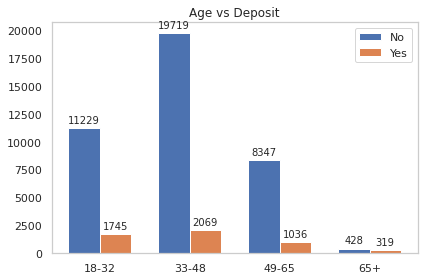

In [54]:
plotbar(age_no, age_yes, "Age vs Deposit", age_labels)

In [55]:
balance_labels = ["Range", "Yes", "No"]

# Extracting data for creating the table for comparing Balance and Y/N deposits

extract_1_y = pd.DataFrame()
extract_1_y = dataset.loc[(dataset.y == "yes") & (dataset.balance < 1000)]

extract_1_n = pd.DataFrame()
extract_1_n = dataset.loc[(dataset.y == "no") & (dataset.balance < 1000)]

extract_1_2_y = pd.DataFrame()
extract_1_2_y = dataset.loc[(dataset.y == "yes") & (dataset.balance > 1000) & (dataset.balance < 2000)]

extract_1_2_n = pd.DataFrame()
extract_1_2_n = dataset.loc[(dataset.y == "no") & (dataset.balance > 1000) & (dataset.balance < 2000)]

extract_2_5_y = pd.DataFrame()
extract_2_5_y = dataset.loc[(dataset.y == "yes") & (dataset.balance > 2000) & (dataset.balance < 5000)]

extract_2_5_n = pd.DataFrame()
extract_2_5_n = dataset.loc[(dataset.y == "no") & (dataset.balance > 2000) & (dataset.balance < 5000)]

extract_5_y = pd.DataFrame()
extract_5_y = dataset.loc[(dataset.y == "yes") & (dataset.balance > 5000)]

extract_5_n = pd.DataFrame()
extract_5_n = dataset.loc[(dataset.y == "no") & (dataset.balance > 5000)]


balance_1 = pd.DataFrame(data=[["< 1.000", len(extract_1_y), len(extract_1_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])

balance_1_2 = pd.DataFrame(data=[["1.000 - 2.000", len(extract_1_2_y), len(extract_1_2_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])
balance_yes_no = balance_1.append(balance_1_2, ignore_index=True)

balance_2_5 = pd.DataFrame(data=[["2.000 - 5.000", len(extract_2_5_y), len(extract_2_5_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])
balance_yes_no = balance_yes_no.append(balance_2_5, ignore_index=True)

balance_5 = pd.DataFrame(data=[["> 5.000", len(extract_5_y), len(extract_5_n)]], 
                          columns=[balance_labels[0], balance_labels[1], balance_labels[2]])
balance_yes_no = balance_yes_no.append(balance_5, ignore_index=True)

balance_yes_no

,Range,Yes,No
0,< 1.000,2971,27399
1,1.000 - 2.000,812,5259
2,2.000 - 5.000,950,4667
3,> 5.000,431,2386


In [56]:
duration_labels = ["Range", "Yes", "No"]

# Extracting data for creating the table for comparing Duration and Y/N deposits

extract_duration_300_y = pd.DataFrame()
extract_duration_300_y = dataset.loc[(dataset.y == "yes") & (dataset.duration >= 1) & (dataset.duration <= 300)]

extract_duration_300_n = pd.DataFrame()
extract_duration_300_n = dataset.loc[(dataset.y == "no") & (dataset.duration >= 1) & (dataset.duration <= 300)]

extract_duration_600_y = pd.DataFrame()
extract_duration_600_y = dataset.loc[(dataset.y == "yes") & (dataset.duration > 300) & (dataset.duration <= 600)]

extract_duration_600_n = pd.DataFrame()
extract_duration_600_n = dataset.loc[(dataset.y == "no") & (dataset.duration > 300) & (dataset.duration <= 600)]

extract_duration_1200_y = pd.DataFrame()
extract_duration_1200_y = dataset.loc[(dataset.y == "yes") & (dataset.duration > 600) & (dataset.duration <= 1200)]

extract_duration_1200_n = pd.DataFrame()
extract_duration_1200_n = dataset.loc[(dataset.y == "no") & (dataset.duration > 600) & (dataset.duration <= 1200)]

extract_duration_1800_y = pd.DataFrame()
extract_duration_1800_y = dataset.loc[(dataset.y == "yes") & (dataset.duration > 1200) & (dataset.duration <= 1800)]

extract_duration_1800_n = pd.DataFrame()
extract_duration_1800_n = dataset.loc[(dataset.y == "no") & (dataset.duration > 1200) & (dataset.duration <= 1800)]

extract_duration_above_1800_y = pd.DataFrame()
extract_duration_above_1800_y = dataset.loc[(dataset.y == "yes") & (dataset.duration > 1800)]

extract_duration_above_1800_n = pd.DataFrame()
extract_duration_above_1800_n = dataset.loc[(dataset.y == "no") & (dataset.duration > 1800)]


duration_300 = pd.DataFrame(data=[["< 300", len(extract_duration_300_y), len(extract_duration_300_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])

duration_600 = pd.DataFrame(data=[["300 - 600", len(extract_duration_600_y), len(extract_duration_600_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_300.append(duration_600, ignore_index=True)

duration_1200 = pd.DataFrame(data=[["600 - 1.200", len(extract_duration_1200_y), len(extract_duration_1200_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_yes_no.append(duration_1200, ignore_index=True)

duration_1800 = pd.DataFrame(data=[["1.200 - 1.800", len(extract_duration_1800_y), len(extract_duration_1800_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_yes_no.append(duration_1800, ignore_index=True)

duration_above_1800 = pd.DataFrame(data=[["> 1.800", len(extract_duration_above_1800_y), len(extract_duration_above_1800_n)]], 
                          columns=[duration_labels[0], duration_labels[1], duration_labels[2]])
duration_yes_no = duration_yes_no.append(duration_above_1800, ignore_index=True)

duration_yes_no

,Range,Yes,No
0,< 300,1775,30929
1,300 - 600,1572,6840
2,600 - 1.200,1479,1737
3,1.200 - 1.800,289,162
4,> 1.800,54,52


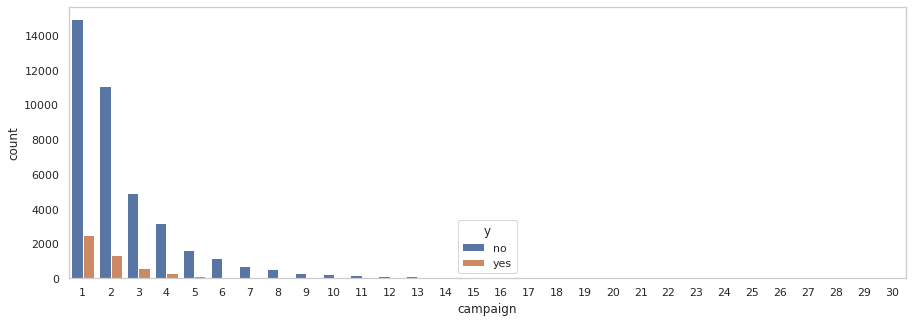

In [57]:
plt.figure(figsize=(15,5))
sns.countplot(x="campaign",hue="y",data=dataset)
plt.show()

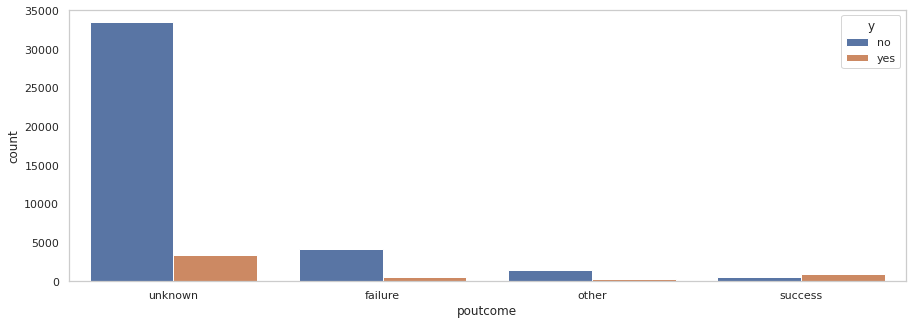

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x="poutcome",hue="y",data=dataset)
plt.show()

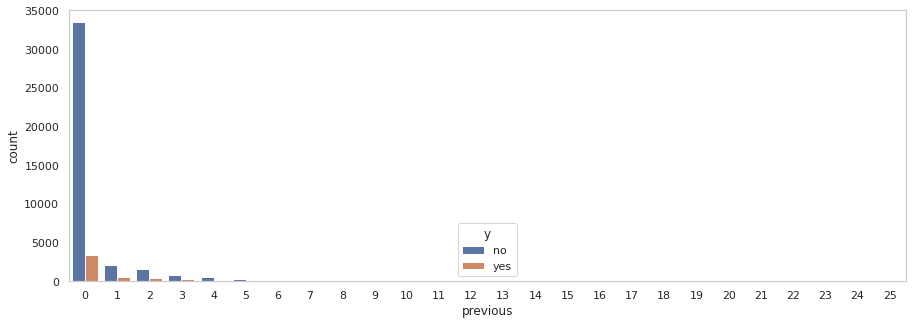

In [59]:
plt.figure(figsize=(15,5))
sns.countplot(x="previous",hue="y",data=dataset)
plt.show()

### Comparision of Dependent Variables

In [60]:
balance_and_jobs = pd.DataFrame()

jobs = ['management', 'technician', 'blue-collar', 'entrepreneur', 'retired', 'unknown', 'student', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid' ]

for job in jobs:
  balance_and_jobs[job] = (dataset[dataset['job'] == job][['job','balance']].describe())['balance']

balance_and_jobs

,management,technician,blue-collar,entrepreneur,retired,unknown,student,admin.,services,self-employed,unemployed,housemaid
count,9358.000000,7549.000000,9684.000000,1481.000000,2251.000000,284.000000,928.000000,5127.000000,4132.000000,1569.000000,1291.000000,1238.000000
mean,1753.677816,1251.650152,1078.686700,1523.514517,1987.225233,1769.338028,1381.151940,1129.142579,996.337125,1652.752071,1522.100697,1394.448304
std,3801.562364,2550.753261,2239.324551,4161.391669,4408.499442,2985.985622,2445.786145,2576.612333,2167.516222,3694.636873,3153.370007,2986.662118
min,-6847.000000,-2827.000000,-8019.000000,-2082.000000,-1598.000000,-295.000000,-679.000000,-1601.000000,-2122.000000,-3313.000000,-1270.000000,-1941.000000
25%,96.000000,61.000000,55.000000,42.000000,163.000000,166.250000,147.750000,62.000000,35.000000,120.000000,94.000000,58.000000
50%,571.000000,418.000000,387.000000,351.000000,785.000000,677.000000,492.000000,395.000000,339.000000,526.000000,529.000000,409.500000
75%,1821.500000,1327.000000,1205.000000,1340.000000,2310.000000,2165.500000,1567.000000,1200.500000,1069.250000,1604.000000,1603.500000,1384.250000
max,102127.000000,45248.000000,66653.000000,59649.000000,81204.000000,19706.000000,24025.000000,64343.000000,57435.000000,52587.000000,44134.000000,45141.000000


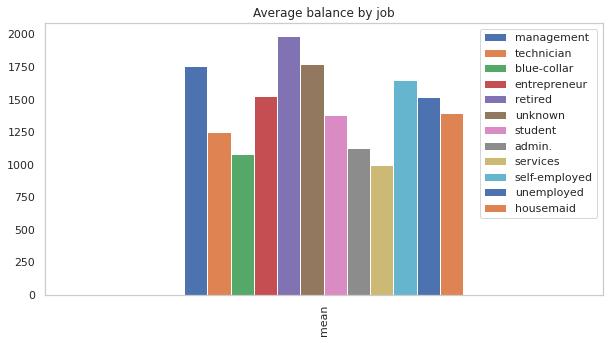

In [61]:
balance_and_jobs.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max']).plot(kind = 'bar', figsize = (10, 5), title = 'Average balance by job')

In [62]:
balance_and_marital = pd.DataFrame()
balance_and_marital['Married'] = (dataset[dataset['marital'] == 'married'][['marital','balance']].describe())['balance']
balance_and_marital['Single'] = (dataset[dataset['marital'] == 'single'][['marital','balance']].describe())['balance']
balance_and_marital['Divorced'] = (dataset[dataset['marital'] == 'divorced'][['marital','balance']].describe())['balance']

balance_and_marital

,Married,Single,Divorced
count,27050.000000,12668.000000,5174.000000
mean,1423.819482,1296.548469,1173.349246
std,3135.422166,2854.960288,2909.427217
min,-6847.000000,-8019.000000,-4057.000000
25%,74.000000,89.000000,25.000000
50%,477.000000,434.000000,347.000000
75%,1515.000000,1326.000000,1202.750000
max,98417.000000,102127.000000,66721.000000


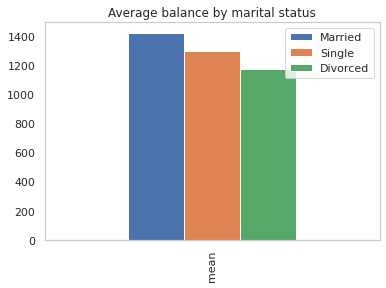

In [63]:
balance_and_marital.drop(['count', 'std', 'min', '25%', '50%', '75%', 'max']).plot.bar(title = 'Average balance by marital status')

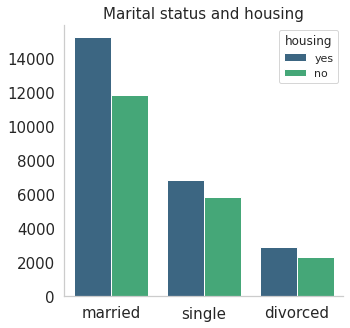

In [64]:
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)
sns.countplot(x = 'marital', hue = 'housing', data = dataset, palette = 'viridis')

ax.set_xlabel("", fontsize = 15)
ax.set_ylabel("", fontsize = 15)
ax.set_title("Marital status and housing", fontsize = 15)
ax.tick_params(labelsize = 15)

sns.despine()

Text(0.5, 1.0, 'Balance by Education')

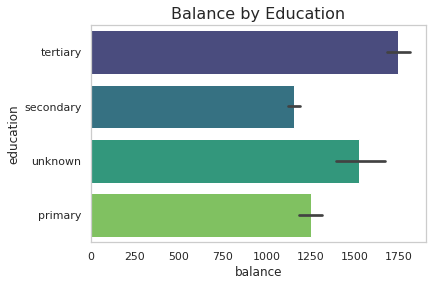

In [65]:
sns.barplot(x="balance", y="education", data=dataset, palette = 'viridis')

plt.title('Balance by Education', fontsize=16)

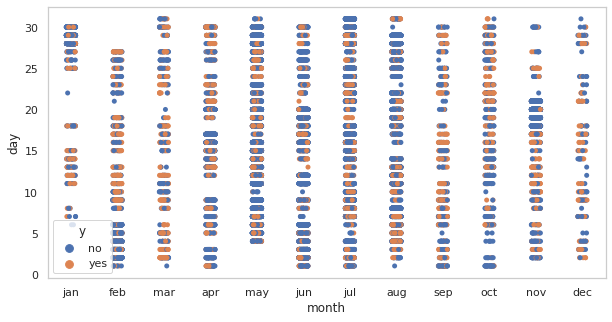

In [66]:
plt.figure(figsize=(10,5))
sns.stripplot(x="month", y="day", hue="y", data = dataset, order=("jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"))
plt.show()

## Data Cleaning

In [67]:
columns_with_yes_no = ['default', 'housing', 'loan', 'y']

for column in columns_with_yes_no:
    dataset[column].replace(['no', 'yes'], [0, 1], inplace=True)
    
dataset.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0,3
1,1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0,2
2,2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0,1
3,3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0,2
4,4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0,1


In [68]:
columns_with_categories = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for column in columns_with_categories:
  dataset[column] = le.fit_transform(dataset[column]) 

cleaned_dataset = dataset.copy()
cleaned_dataset.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_range
0,0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,3
1,1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,2
2,2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,1
3,3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,2
4,4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,1


In [69]:
# dropped: contact, day, duration, campaign, previous, pdays
cleaned_dataset = cleaned_dataset[['age_range', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'month', 'poutcome', 'y']]

In [70]:
cleaned_dataset.head()

,age_range,job,marital,education,default,balance,housing,loan,month,poutcome,y
0,3,4,1,2,0,2143,1,0,8,3,0
1,2,9,2,1,0,29,1,0,8,3,0
2,1,2,1,1,0,2,1,1,8,3,0
3,2,1,1,3,0,1506,1,0,8,3,0
4,1,11,2,3,0,1,0,0,8,3,0


## Correlation Between Features

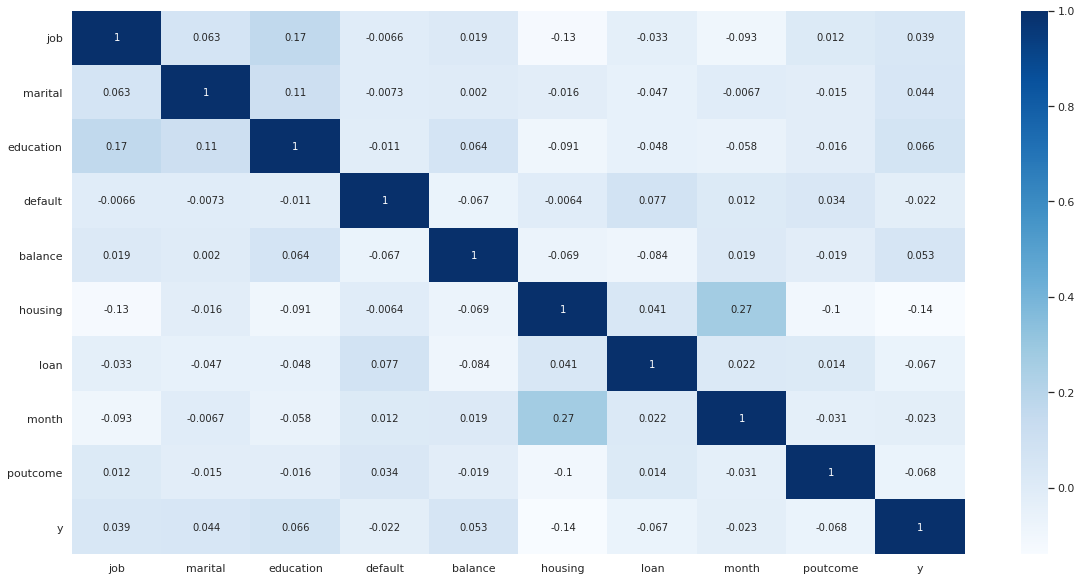

In [71]:
fig = plt.figure(figsize = (20,10))
sns.heatmap(cleaned_dataset.corr(), cmap='Blues', annot = True)

## Preparation for training and testing

#### Defining dependent and independent variables

In [72]:
X = cleaned_dataset.iloc[:, :-1].values
y = cleaned_dataset.iloc[:, -1].values

#### Splitting the dataset into the Training and Test set

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Models

#### 1. Logistic Classification

In [75]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression(random_state = 0)
log_classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_pred = log_classifier.predict(X_test)

In [77]:
cm_log = confusion_matrix(y_test, y_pred)
print(cm_log)
accuracy_score(y_test, y_pred)

[[9959    1]
 [1263    0]]


0.8873741423861713

In [78]:
accuracies = cross_val_score(estimator = log_classifier, X = X_train, y = y_train, cv = 10)
accuracy_score_lin_reg = "{:.2f} %".format(accuracies.mean()*100)
std_lin_reg = "{:.2f} %".format(accuracies.std()*100)

In [79]:
results_df = pd.DataFrame(data=[["Linear Regression", accuracy_score_lin_reg, std_lin_reg]], 
                          columns=['Model', 'Accuracy Score', 'Standard Deviation'])
results_df

,Model,Accuracy Score,Standard Deviation
0,Linear Regression,88.39 %,0.03 %


#### 2. KNN

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [81]:
y_pred = knn_classifier.predict(X_test)

In [82]:
cm_knn = confusion_matrix(y_test, y_pred)
print(cm_knn)
accuracy_score(y_test, y_pred)

[[9730  230]
 [1059  204]]


0.8851465739998218

In [83]:
accuracies = cross_val_score(estimator = knn_classifier, X = X_train, y = y_train, cv = 10)
accuracy_score_knn = "{:.2f} %".format(accuracies.mean()*100)
std_knn = "{:.2f} %".format(accuracies.std()*100)

In [84]:
results_df_2 = pd.DataFrame(data=[["KNN", accuracy_score_knn, std_knn]], 
                          columns=['Model', 'Accuracy Score', 'Standard Deviation'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Accuracy Score,Standard Deviation
0,Linear Regression,88.39 %,0.03 %
1,KNN,88.34 %,0.21 %


#### 3. SVM

In [85]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel = 'linear', random_state = 0)
svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [86]:
y_pred = svm_classifier.predict(X_test)

In [87]:
cm_svm = confusion_matrix(y_test, y_pred)
print(cm_svm)
accuracy_score(y_test, y_pred)

[[9960    0]
 [1263    0]]


0.8874632451216252

In [88]:
accuracies = cross_val_score(estimator = svm_classifier, X = X_train, y = y_train, cv = 10)
accuracy_score_svm = "{:.2f} %".format(accuracies.mean()*100)
std_svm = "{:.2f} %".format(accuracies.std()*100)

In [89]:
results_df_3 = pd.DataFrame(data=[["SVM", accuracy_score_svm, std_svm]], 
                          columns=['Model', 'Accuracy Score', 'Standard Deviation'])
results_df = results_df.append(results_df_3, ignore_index=True)
results_df

,Model,Accuracy Score,Standard Deviation
0,Linear Regression,88.39 %,0.03 %
1,KNN,88.34 %,0.21 %
2,SVM,88.40 %,0.01 %


#### 4. Kernel SVM

In [90]:
from sklearn.svm import SVC
kernel_svm_classifier = SVC(kernel = 'rbf', random_state = 0)
kernel_svm_classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [91]:
y_pred = kernel_svm_classifier.predict(X_test)

In [92]:
cm_kernel_svm = confusion_matrix(y_test, y_pred)
print(cm_kernel_svm)
accuracy_score(y_test, y_pred)

[[9830  130]
 [1076  187]]


0.892542101042502

In [93]:
accuracies = cross_val_score(estimator = kernel_svm_classifier, X = X_train, y = y_train, cv = 10)
accuracy_score_kernel_svm = "{:.2f} %".format(accuracies.mean()*100)
std_kernel_svm = "{:.2f} %".format(accuracies.std()*100)

In [94]:
results_df_4 = pd.DataFrame(data=[["Kernel SVM", accuracy_score_kernel_svm, std_kernel_svm]], 
                          columns=['Model', 'Accuracy Score', 'Standard Deviation'])
results_df = results_df.append(results_df_4, ignore_index=True)
results_df

,Model,Accuracy Score,Standard Deviation
0,Linear Regression,88.39 %,0.03 %
1,KNN,88.34 %,0.21 %
2,SVM,88.40 %,0.01 %
3,Kernel SVM,89.03 %,0.26 %


#### 5. Naive Bayes

In [95]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
y_pred = nb_classifier.predict(X_test)

In [97]:
cm_nb = confusion_matrix(y_test, y_pred)
print(cm_nb)
accuracy_score(y_test, y_pred)

[[9625  335]
 [1151  112]]


0.867593335115388

In [98]:
accuracies = cross_val_score(estimator = nb_classifier, X = X_train, y = y_train, cv = 10)
accuracy_score_nb = "{:.2f} %".format(accuracies.mean()*100)
std_nb = "{:.2f} %".format(accuracies.std()*100)

In [99]:
results_df_5 = pd.DataFrame(data=[["Naive Bayes", accuracy_score_nb, std_nb]], 
                          columns=['Model', 'Accuracy Score', 'Standard Deviation'])
results_df = results_df.append(results_df_5, ignore_index=True)
results_df

,Model,Accuracy Score,Standard Deviation
0,Linear Regression,88.39 %,0.03 %
1,KNN,88.34 %,0.21 %
2,SVM,88.40 %,0.01 %
3,Kernel SVM,89.03 %,0.26 %
4,Naive Bayes,86.57 %,0.53 %


#### 6. Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [101]:
y_pred = decision_tree_classifier.predict(X_test)

In [102]:
cm_decision_tree = confusion_matrix(y_test, y_pred)
print(cm_decision_tree)
accuracy_score(y_test, y_pred)

[[8945 1015]
 [ 900  363]]


0.8293682616056313

In [103]:
accuracies = cross_val_score(estimator = decision_tree_classifier, X = X_train, y = y_train, cv = 10)
accuracy_score_decision_tree = "{:.2f} %".format(accuracies.mean()*100)
std_decision_tree = "{:.2f} %".format(accuracies.std()*100)

In [104]:
results_df_6 = pd.DataFrame(data=[["Decision Tree", accuracy_score_decision_tree, std_decision_tree]], 
                          columns=['Model', 'Accuracy Score', 'Standard Deviation'])
results_df = results_df.append(results_df_6, ignore_index=True)
results_df

,Model,Accuracy Score,Standard Deviation
0,Linear Regression,88.39 %,0.03 %
1,KNN,88.34 %,0.21 %
2,SVM,88.40 %,0.01 %
3,Kernel SVM,89.03 %,0.26 %
4,Naive Bayes,86.57 %,0.53 %
5,Decision Tree,82.87 %,0.33 %


#### 7. Random Forest

In [105]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [106]:
y_pred = random_forest_classifier.predict(X_test)

In [107]:
cm_random_forest = confusion_matrix(y_test, y_pred)
print(cm_random_forest)
accuracy_score(y_test, y_pred)

[[9565  395]
 [1003  260]]


0.8754343758353381

In [108]:
accuracies = cross_val_score(estimator = random_forest_classifier, X = X_train, y = y_train, cv = 10)
accuracy_score_random_forest = "{:.2f} %".format(accuracies.mean()*100)
std_random_forest = "{:.2f} %".format(accuracies.std()*100)

In [109]:
results_df_7 = pd.DataFrame(data=[["Random Forest", accuracy_score_random_forest, std_random_forest]], 
                          columns=['Model', 'Accuracy Score', 'Standard Deviation'])
results_df = results_df.append(results_df_7, ignore_index=True)
results_df

,Model,Accuracy Score,Standard Deviation
0,Linear Regression,88.39 %,0.03 %
1,KNN,88.34 %,0.21 %
2,SVM,88.40 %,0.01 %
3,Kernel SVM,89.03 %,0.26 %
4,Naive Bayes,86.57 %,0.53 %
5,Decision Tree,82.87 %,0.33 %
6,Random Forest,87.48 %,0.27 %


#### 8. XGBoost

In [110]:
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [111]:
y_pred = xgb_classifier.predict(X_test)

In [112]:
cm_xgb = confusion_matrix(y_test, y_pred)
print(cm_xgb)
accuracy_score(y_test, y_pred)

[[9848  112]
 [1051  212]]


0.8963735186670231

In [113]:
accuracies = cross_val_score(estimator = xgb_classifier, X = X_train, y = y_train, cv = 10)
accuracy_score_xgb = "{:.2f} %".format(accuracies.mean()*100)
std_xgb = "{:.2f} %".format(accuracies.std()*100)

In [114]:
results_df_8 = pd.DataFrame(data=[["XGBoost", accuracy_score_xgb, std_xgb]], 
                          columns=['Model', 'Accuracy Score', 'Standard Deviation'])
results_df = results_df.append(results_df_8, ignore_index=True)
results_df

,Model,Accuracy Score,Standard Deviation
0,Linear Regression,88.39 %,0.03 %
1,KNN,88.34 %,0.21 %
2,SVM,88.40 %,0.01 %
3,Kernel SVM,89.03 %,0.26 %
4,Naive Bayes,86.57 %,0.53 %
5,Decision Tree,82.87 %,0.33 %
6,Random Forest,87.48 %,0.27 %
7,XGBoost,89.35 %,0.26 %
